# Summarizing metrics from single lines

Leanne Friedrich 08/02/21

## initialization

In [2]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [4]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## importing data

In [110]:
tt, u = me.stillsSummary(os.path.join(cfg.path.server, 'singleLines'), cfg.path.fig)

INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.25
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.50
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_2.75
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_3.00
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_3.50
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.25_S_4.00
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleLines\LapRD LapRD 1day\I_2.50_S_2.25
INFO: //cfs2e.nist.gov/642/internal/3D Printing Lab/Sho

In [161]:
tt, u = me.progTable(os.path.join(cfg.path.server, 'singleLines'), cfg.path.fig, 'progTable.csv')

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\progTable.csv


In [180]:
ttdefault, u2 = me.progTable(os.path.join(cfg.path.server, 'singleLines', 'vels mineral LapRD'), cfg.path.fig, 'progTableDefault.csv', useDefault=True)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\progTableDefault.csv


In [191]:
ttdefault = tt2

In [163]:
tt.keys()

Index(['horiz_a', 'horiz_l', 'horiz_t', 'horiz_vol', 'horiz_w', 'vert_a',
       'vert_l', 'vert_t', 'vert_vol', 'vert_w', 'xs_a', 'xs_l', 'xs_t',
       'xs_vol', 'xs_w', 'bn', 'vink', 'vsup', 'pressure'],
      dtype='object')

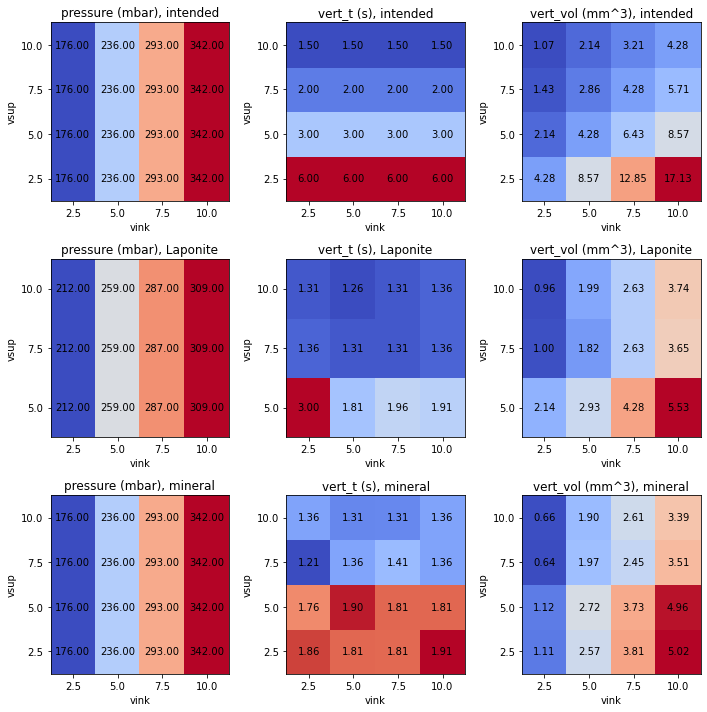

In [198]:
fig, axs = plt.subplots(3,3,figsize=(10,10))
tt1 = tt[tt.bn.str.contains('210824')]
ttmineral = tt1[tt1.bn.str.contains('I_M')]
ttlap = tt1[tt1.bn.str.contains('I_2.7')]
for j,tti in enumerate([[ttdefault, 'intended'], [ttlap, 'Laponite'], [ttmineral, 'mineral']]):
    for i,s in enumerate(['pressure', 'vert_t', 'vert_vol']):
        mp.colorMeshSS(tti[0], 'vink', 'vsup', s, dx=0, dy=0, fig=fig, ax=axs[j][i], legend=False)
        axs[j][i].set_title(f'{s} ({u[s]}), {tti[1]}')
fig.tight_layout()

In [197]:
ttlap

,horiz_a,horiz_l,horiz_t,horiz_vol,horiz_w,vert_a,vert_l,vert_t,vert_vol,vert_w,xs_a,xs_l,xs_t,xs_vol,xs_w,bn,vink,vsup,pressure
0,0.259267,14.076717,1.407672,3.649610,0.603000,0.275704,13.585095,1.358510,3.742596,0.603000,0.277395,6.844100,0.684410,1.898853,0.603000,I_2.75_S_2.75_VI_10_VS_10_210824,10.0,10.0,309.0
0,0.547602,16.436868,3.287374,8.996119,0.852771,0.577107,9.560106,1.912021,5.530032,0.852771,0.553238,9.062012,1.812402,5.013605,0.852771,I_2.75_S_2.75_VI_10_VS_5_210824,10.0,5.0,309.0
0,0.364144,14.085002,1.878000,5.134513,0.696284,0.358669,10.183239,1.357765,3.645429,0.696284,0.356961,7.236588,0.964878,2.583701,0.696284,I_2.75_S_2.75_VI_10_VS_7.5_210824,10.0,7.5,309.0
0,0.075379,14.093457,1.409346,1.062356,0.301500,0.073527,13.100133,1.310013,0.963413,0.301500,0.107740,7.637272,0.763727,0.838408,0.301500,I_2.75_S_2.75_VI_2.5_VS_10_210824,2.5,10.0,212.0
0,0.142789,22.500000,4.500000,3.212751,0.426385,0.142789,15.000000,3.000000,2.141834,0.426385,0.142789,15.000000,3.000000,2.141834,0.426385,I_2.75_S_2.75_VI_2.5_VS_5_210824,2.5,5.0,212.0
0,0.104602,14.577582,1.943678,1.528874,0.348142,0.098549,10.186974,1.358263,1.003416,0.348142,0.111943,6.961659,0.928221,0.787333,0.348142,I_2.75_S_2.75_VI_2.5_VS_7.5_210824,2.5,7.5,212.0
0,0.164855,14.106817,1.410682,2.324921,0.426385,0.157171,12.585117,1.258512,1.991725,0.426385,0.138630,6.436710,0.643671,0.892203,0.426385,I_2.75_S_2.75_VI_5_VS_10_210824,5.0,10.0,259.0
0,0.280177,16.090157,3.218031,4.508086,0.603000,0.323383,9.051319,1.810264,2.926964,0.603000,0.283786,8.849405,1.769881,2.509832,0.603000,I_2.75_S_2.75_VI_5_VS_5_210824,5.0,5.0,259.0
0,0.209086,13.577623,1.810350,2.838976,0.492347,0.184828,9.827031,1.310271,1.816299,0.492347,0.190632,6.031607,0.804214,1.149870,0.492347,I_2.75_S_2.75_VI_5_VS_7.5_210824,5.0,7.5,259.0
0,0.209242,14.779997,1.478000,3.104694,0.522213,0.200585,13.120152,1.312015,2.631166,0.522213,0.204341,7.648830,0.764883,1.565500,0.522213,I_2.75_S_2.75_VI_7.5_VS_10_210824,7.5,10.0,287.0
